### Image Processing with Python

Now that you have downloaded some Planetscope imagery, what can you do with it? This workshop includes an interactive overview of basic image processing with rasters and vectors in Python with spatial libraries like rasterio and geopandas.


#### Background
Lake Lagunita on Stanford Campus is not a permanantly filled lake unless high rainfall fills it by diversion from San Francisquito Creek. Let's use Python libraries to inspect this area and the timing of a flooding event in the winter of 2022/2023 ([link to Explorer](https://www.planet.com/explorer/?s=VQxuExgIQwOCE3LaspaYgQ)) with Planetscope imagery.

### Import spatial and plotting libraries

Below we will import a handful of raster and vector processing libraries.  Notable processing libraries include **rasterio** and **geopandas**.

**Rasterio** is a Python library for working with geospatial raster data. Rasterio makes it easy to open, read, and write raster datasets in various formats, such as GeoTIFF and JPEG, and perform common geospatial operations.

**GeoPandas** is an open-source Python library that extends the capabilities of the popular Pandas library to handle geospatial data. Many geopandas datasets will take the form of a dataframe with a "geometry" column that allows for spatial operations like plotting, joining, or clipping and aggregating raster data. It simplifies the manipulation and analysis of geographic datasets, allowing users to work with both vector and raster data within a unified framework.

#### Install Libraries

In [3]:
"""
This code installs the scikit-image library for image processing with Python.
"""
!pip install scikit-image

#### Import Libraries

In [4]:
# Import libraries

import os
import glob


import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
from rasterio import features
from skimage import exposure

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

The above Python code is importing several libraries that are commonly used for image processing and data analysis. If you're seeing errors about unknown words or unresolved imports, it's likely that the libraries are not installed in your Python environment. Here's a brief explanation of what each library does:

- `os` and `glob` are built-in Python libraries for interacting with the operating system and file system, respectively.

- `geopandas` is a library for working with geospatial data.

- `matplotlib.pyplot` is a library for creating static, animated, and interactive visualizations in Python.

- `numpy` is a library for numerical computing in Python.

- `pandas` is a library for data manipulation and analysis.

- `rasterio` is a library for reading and writing geospatial raster datasets.

- `features` is a module in `rasterio` that provides functions to work with features in raster datasets.

- `skimage` (Scikit-image) is a library for image processing in Python.

- `exposure` is a module in `skimage` that provides functions for adjusting image contrast.

- `warnings` is a built-in Python library for dealing with warning messages.

- `%matplotlib inline` is a magic command in Jupyter Notebook that sets the backend of matplotlib to the 'inline' backend, so the output of plotting commands is displayed inline within frontends like Jupyter notebook, directly below the code cell that produced it.


In [5]:
data_dir = "/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2"
glob.glob(os.path.join(data_dir, "*"))

['/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/image_processing_with_python.ipynb',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/geoms',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data']

The above Python code is working with file paths and directories using the built-in `os` and `glob` libraries.

- `data_dir = "/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2"`: This line is defining a variable `data_dir` and assigning it a string that represents a file path on the system. This path seems to be pointing to a directory where some data for a workshop is stored.

- `glob.glob(os.path.join(data_dir, "*"))`: This line is using the `glob` library to find all files in the `data_dir` directory. The `os.path.join(data_dir, "*")` part is creating a string that represents a file path pattern. The `*` is a wildcard that matches any file or folder name, so this pattern will match any file or folder in `data_dir`. The `glob.glob` function then returns a list of file paths that match this pattern.

In summary, this code is creating a list of all files and folders in the `data_dir` directory.

In [6]:
glob.glob(os.path.join(data_dir, "data", "*composite.tif"))

['/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-12-18_strip_6153179_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-07-30_strip_6682704_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-02-15_strip_6290924_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-03-25_strip_6384901_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-08-16_strip_6717370_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-04-24_strip_6458341_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-08-30_strip_6743722_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-06-30_strip_6615371_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/da

The above Python code is using the `glob` and `os` libraries to find all files in a specific directory that match a certain pattern.

- `os.path.join(data_dir, "data", "*composite.tif")`: This line is creating a string that represents a file path pattern. The `os.path.join` function is used to construct a file path by joining the `data_dir` variable, the string "data", and the string "*composite.tif". The result is a file path that points to the "data" subdirectory of `data_dir` and includes any file that ends with "composite.tif".

- `glob.glob(...)`: This function is used to find all files that match the file path pattern created by `os.path.join`. The `*` in "*composite.tif" is a wildcard that matches any sequence of characters, so "*composite.tif" will match any file that ends with "composite.tif".

In summary, this line of code is creating a list of all .tif files in the "data" subdirectory of `data_dir` that have a name ending with "composite".

In [7]:
files = glob.glob(os.path.join(data_dir, "data", "*composite.tif"))

The above Python code is using the `glob` and `os` libraries to find all files in a specific directory that match a certain pattern, and then storing the list of file paths in the `files` variable.

- `os.path.join(data_dir, "data", "*composite.tif")`: This line is creating a string that represents a file path pattern. The `os.path.join` function is used to construct a file path by joining the `data_dir` variable, the string "data", and the string "*composite.tif". The result is a file path that points to the "data" subdirectory of `data_dir` and includes any file that ends with "composite.tif".

- `glob.glob(...)`: This function is used to find all files that match the file path pattern created by `os.path.join`. The `*` in "*composite.tif" is a wildcard that matches any sequence of characters, so "*composite.tif" will match any file that ends with "composite.tif".

- `files = ...`: This line is assigning the list of file paths returned by `glob.glob` to the variable `files`.

In summary, this line of code is creating a list of all .tif files in the "data" subdirectory of `data_dir` that have a name ending with "composite", and storing this list in the `files` variable.

Let's select a single file to explore its contents. We'll revisit the rest later.

In [8]:
test_file = os.path.join(data_dir, "data", "2023-04-15_strip_6437085_composite.tif")
os.path.exists(test_file)

True

The above Python code is using the `os` library to work with file paths and to check if a specific file exists.

- `test_file = os.path.join(data_dir, "data", "2023-04-15_strip_6437085_composite.tif")`: This line is creating a string that represents a file path. The `os.path.join` function is used to construct a file path by joining the `data_dir` variable, the string "data", and the string "2023-04-15_strip_6437085_composite.tif". The result is a file path that points to a specific .tif file in the "data" subdirectory of `data_dir`.

- `os.path.exists(test_file)`: This line is checking if the file at the path stored in `test_file` exists. The `os.path.exists` function returns `True` if the file or directory at the specified path exists and `False` otherwise.

In summary, this code is constructing a file path to a specific .tif file and then checking if that file exists.

In [9]:
# Read the file with Rasterio
with rasterio.open(test_file) as src:
    print(src.meta)
    # From the open src image, let's save the array as a variable.
    arr = src.read()/10000

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 438, 'height': 343, 'count': 8, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(3.0, 0.0, 572298.0,
       0.0, -3.0, 4142520.0)}


The above Python code is using the `rasterio` library to open and read data from a raster file, which is typically an image file that contains geospatial data.

- `with rasterio.open(test_file) as src:`: This line is opening the file at the path stored in `test_file` using `rasterio.open`. The `with` statement is used here to ensure that the file is properly closed after we're done with it. The opened file is referred to as `src` within the `with` block.

- `print(src.meta)`: This line is printing the metadata of the opened raster file. The metadata typically includes information like the number of bands, the number of rows and columns, the data type of the pixels, the coordinate reference system, and the geotransform.

- `arr = src.read()/10000`: This line is reading the data from the opened raster file into a NumPy array, and then dividing all the values in the array by 10000. The division by 10000 is a common operation when working with satellite imagery, as the data is often stored as integers with a scale factor, in this case, 10000, to maintain precision while saving space.

In summary, this code is opening a raster file, printing its metadata, and reading its data into a NumPy array while scaling the values by a factor of 10000.

In [10]:
arr.shape

(8, 343, 438)

The above Python code is accessing the `shape` attribute of a NumPy array named `arr`.

- `arr.shape`: This line is retrieving the shape of the array `arr`. In NumPy, the `shape` attribute of an array returns a tuple representing the dimensions of the array. For a 2D array, the shape would be `(n, m)`, where `n` is the number of rows and `m` is the number of columns. For a 3D array, the shape would be `(p, n, m)`, where `p` is the number of layers, `n` is the number of rows, and `m` is the number of columns.

In the context of image processing, a 2D array might represent a grayscale image, where each element corresponds to a pixel intensity. A 3D array might represent a color image, where each layer corresponds to a color channel (e.g., red, green, blue), and each element within a layer corresponds to a pixel intensity in that channel.

In summary, this line of code is retrieving the dimensions of the array `arr`, which could represent an image or a layer of an image.

As we read the array, we must divide reflectance by 10,000 because Planet imagery stores reflectance as a value scaled by 10,000 to adhere to the required data type (uint16) while maintaining decimal precision (described in Atmospheric Corrections on page 18 of the [Product Spec](https://assets.planet.com/docs/Planet_PSScene_Imagery_Product_Spec_letter_screen.pdf)).

### Plotting individual bands in greyscale

Next, we will plot individual bands in greyscale to check absorption features of the land cover types we do know.

In [11]:
# Order of the bands for 8-band planetscope imagery is from lowest to highest wavelength
band_order = ["coastal_blue", "blue", "green_I", "green", "yellow", "red", "red_edge", "nir"]

The above Python code is defining a list of strings that represent the order of bands in 8-band PlanetScope imagery.

- `band_order = ["coastal_blue", "blue", "green_I", "green", "yellow", "red", "red_edge", "nir"]`: This line is creating a list named `band_order` and assigning it the names of the bands in the order they appear in the imagery. The bands are ordered from lowest to highest wavelength.

PlanetScope is a type of satellite imagery provided by Planet Labs. Each band in the imagery captures light within a specific range of wavelengths. The bands in this list are:

- "coastal_blue": This band captures light in the coastal blue (or ultraviolet) part of the spectrum.
- "blue": This band captures light in the blue part of the spectrum.
- "green_I" and "green": These bands capture light in the green part of the spectrum.
- "yellow": This band captures light in the yellow part of the spectrum.
- "red": This band captures light in the red part of the spectrum.
- "red_edge": This band captures light in the boundary region between the red and near-infrared parts of the spectrum, known as the red edge.
- "nir": This band captures light in the near-infrared part of the spectrum.

In summary, this line of code is defining the order of bands in 8-band PlanetScope imagery, from the band that captures the shortest wavelengths of light to the band that captures the longest wavelengths.

In [12]:
# With the list above, we can identify the index of a color by name and use it to access that layer in the array.
band_order.index("red")

5

The above Python code is using the `index` method of a list to find the position of a specific item in the list.

- `band_order.index("red")`: This line is calling the `index` method on the `band_order` list with the argument "red". The `index` method returns the first index at which a given element can be found in the list. In this case, it's returning the position of the string "red" in the `band_order` list.

In the context of the previous code, `band_order` is a list of band names in 8-band PlanetScope imagery, ordered from lowest to highest wavelength. So, this line of code is finding the position of the "red" band in that order.

In summary, this line of code is finding the position of the "red" band in the `band_order` list, which could be used to access that band in the imagery data.

In [13]:
arr[5].shape

(343, 438)

The above Python code is accessing a specific layer of a 3D NumPy array and retrieving its shape.

- `arr[5]`: This line is accessing the sixth layer of the 3D array `arr`. In Python, indexing is zero-based, which means the first element is at index 0, the second element is at index 1, and so on. So, `arr[5]` refers to the sixth element or layer of the array.

- `.shape`: This is retrieving the shape of the sixth layer of the array. In NumPy, the `shape` attribute of an array returns a tuple representing the dimensions of the array. For a 2D array, the shape would be `(n, m)`, where `n` is the number of rows and `m` is the number of columns.

In the context of image processing, a 3D array might represent a multi-band image, where each layer corresponds to a different band or channel of the image, and each element within a layer corresponds to a pixel value in that band.

In summary, this line of code is retrieving the dimensions of the sixth band or layer of the image represented by the array `arr`.

We'll use the ordered list of bands to loop over and plot each band in greyscale, and title the plot according to the color name.

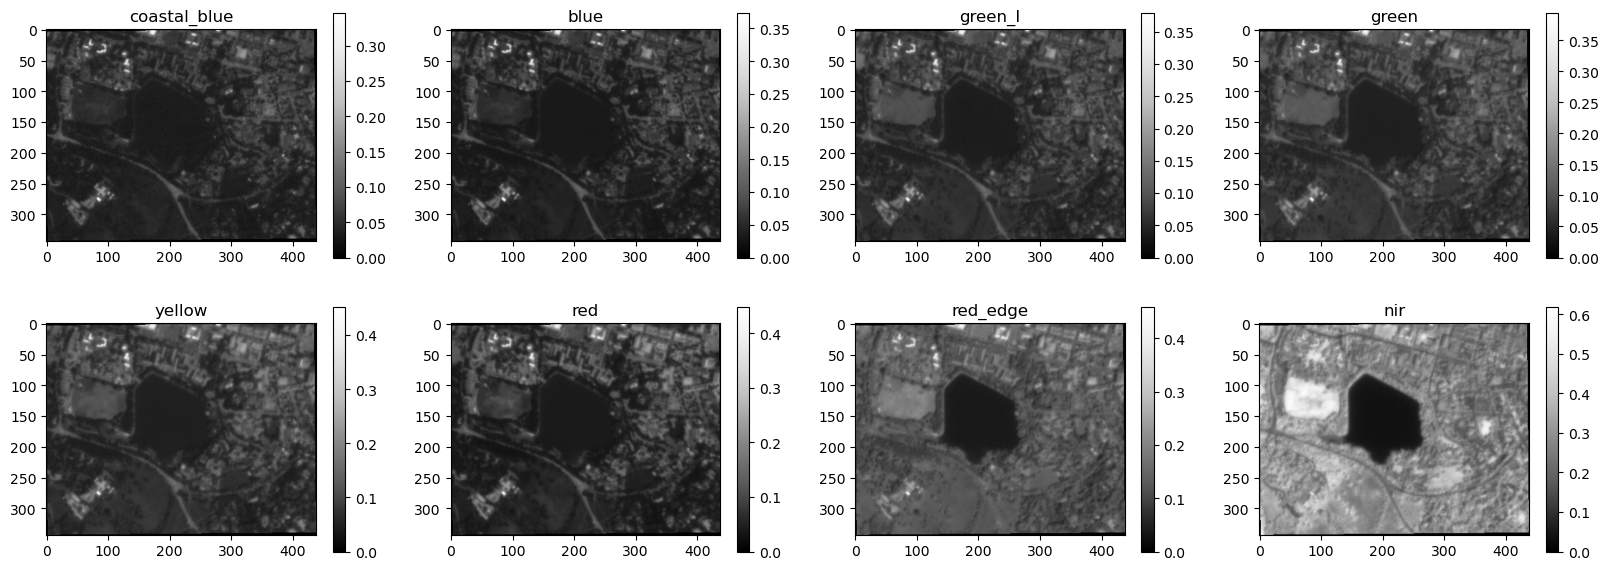

In [14]:
# Define the layout of our figure
nrow = 2
ncol = 4
f, axes = plt.subplots(nrow, ncol, figsize=(5*ncol, 3.5*nrow))

# Loop over every band name and axis available in the plot together
for band_name, ax in zip(band_order, axes.flatten()):
    # Extract the band from our array
    band_index = band_order.index(band_name)
    band_arr = arr[band_index]

    # Plot in greyscale to the subplot
    im = ax.imshow(band_arr, cmap="Greys_r")
    f.colorbar(im, ax=ax)

    # Set the title for the subplot
    ax.set_title(band_name)

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) to create a figure with multiple subplots, each displaying a different band of an image in grayscale.

- `nrow = 2` and `ncol = 4`: These lines are defining the number of rows and columns for the subplots in the figure.

- `f, axes = plt.subplots(nrow, ncol, figsize=(5*ncol, 3.5*nrow))`: This line is creating a new figure `f` with a grid of subplots. The grid has `nrow` rows and `ncol` columns. The `figsize` argument is setting the width and height of the figure in inches.

- `for band_name, ax in zip(band_order, axes.flatten()):`: This line is starting a loop that iterates over the band names in `band_order` and the subplot axes in `axes` at the same time. The `zip` function is used to iterate over multiple lists simultaneously, and `axes.flatten()` is used to convert the 2D array of axes to a 1D array.

- `band_index = band_order.index(band_name)` and `band_arr = arr[band_index]`: These lines are finding the index of the current band name in `band_order` and using that index to access the corresponding band in the 3D array `arr`.

- `im = ax.imshow(band_arr, cmap="Greys_r")` and `f.colorbar(im, ax=ax)`: These lines are displaying the band data as an image in the current subplot `ax` using a grayscale color map, and adding a colorbar to the subplot.

- `ax.set_title(band_name)`: This line is setting the title of the current subplot to the name of the current band.

In summary, this code is creating a figure with multiple subplots, and for each band in the image, it's displaying the band data as a grayscale image in a subplot and setting the title of the subplot to the band name.

We've plotted all of the bands!

Note reflectance and absorption of different wavelengths by features we know:
- water absorbing most wavelengths more than other features
- buildings reflecting most wavelengths, so they're bright in most subplots
- grassy field absorb blues and reds, and in increasing intensity reflect yellow, greens, red edge, and NIR

### Creating a function to plot an RGB

Let's plot an RGB image next!

First, we can test how best to stretch and plot the image before writing a function.

In [15]:
# Save R, G, and B as variables
red = arr[band_order.index("red")]
green = arr[band_order.index("green")]
blue = arr[band_order.index("blue")]

# Stack them into a single array
img = np.stack([red, green, blue], axis=2)

The above Python code is extracting the red, green, and blue bands from a 3D NumPy array and stacking them into a new 3D array.

- `red = arr[band_order.index("red")]`, `green = arr[band_order.index("green")]`, and `blue = arr[band_order.index("blue")]`: These lines are finding the indices of the "red", "green", and "blue" bands in the `band_order` list, and using those indices to access the corresponding bands in the 3D array `arr`. The bands are saved as the variables `red`, `green`, and `blue`.

- `img = np.stack([red, green, blue], axis=2)`: This line is stacking the `red`, `green`, and `blue` arrays along a new third axis using the `np.stack` function. The `axis` argument is set to 2, which means the new axis is added as the third dimension. The result is a new 3D array `img` where the first layer is the red band, the second layer is the green band, and the third layer is the blue band.

In the context of image processing, a 3D array often represents a color image, where each layer corresponds to a color channel (e.g., red, green, blue), and each element within a layer corresponds to a pixel value in that channel.

In summary, this code is extracting the red, green, and blue bands from a multi-band image and stacking them into a new 3D array that represents a color image.

When plotting an RGB image you are plotting 3 bands together and decisions must be made about how best to balance the color contrast. This is unlike individual bands plotted above where matplotlib can dynamically stretch to fit the range of individual bands.

One common approach to color balancing an RGB is rescaling all bands to a range defined by their 2nd and 98th percentiles.

In [16]:
# Rescale surface reflectance values for plotting with color balance
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

The above Python code is using the `numpy` and `skimage.exposure` libraries to rescale the intensity values of an image for better visualization.

- `p2, p98 = np.percentile(img, (2, 98))`: This line is calculating the 2nd and 98th percentiles of the pixel intensity values in the image `img` using the `np.percentile` function. The 2nd percentile `p2` is the value below which 2% of the data fall, and the 98th percentile `p98` is the value below which 98% of the data fall. These percentiles are being used to define a range of intensity values that excludes the lowest and highest 2% of the data, which can help to reduce the impact of outliers on the visualization.

- `img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))`: This line is rescaling the intensity values of the image `img` to fall within the range defined by `p2` and `p98` using the `exposure.rescale_intensity` function. The `in_range` argument is set to `(p2, p98)`, which means the intensity values below `p2` are rescaled to 0, the intensity values above `p98` are rescaled to 1, and the intensity values in between are rescaled to fall within the range 0 to 1.

In summary, this code is rescaling the intensity values of an image to improve its visualization by reducing the impact of outliers and ensuring a balanced color range.

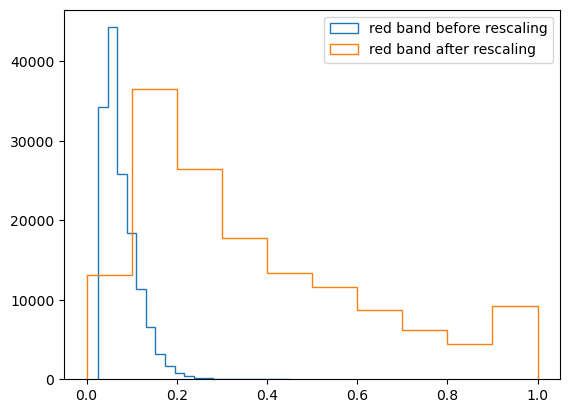

In [17]:
f, ax = plt.subplots()
ax.hist(red[red!=0], label="red band before rescaling", histtype="step", bins = 20);
ax.hist(img_rescale[:, :, 0][red!=0], label="red band after rescaling", histtype="step")
ax.legend();

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) to create a histogram that compares the distribution of pixel values in the red band of an image before and after rescaling.

- `f, ax = plt.subplots()`: This line is creating a new figure `f` with a single subplot `ax`.

- `ax.hist(red[red!=0], label="red band before rescaling", histtype="step", bins = 20)`: This line is creating a histogram of the pixel values in the `red` array that are not equal to 0. The `label` argument is setting the label for this histogram to "red band before rescaling", the `histtype` argument is setting the type of histogram to "step", which means the histogram is drawn as a line, and the `bins` argument is setting the number of bins to 20.

- `ax.hist(img_rescale[:, :, 0][red!=0], label="red band after rescaling", histtype="step")`: This line is creating a histogram of the pixel values in the first layer of the `img_rescale` array (which corresponds to the rescaled red band) that are at the same locations where the pixel values in the `red` array are not equal to 0. The `label` argument is setting the label for this histogram to "red band after rescaling", and the `histtype` argument is setting the type of histogram to "step".

- `ax.legend()`: This line is adding a legend to the subplot, which will display the labels for the two histograms.

In summary, this code is creating a figure with a histogram that compares the distribution of pixel values in the red band of an image before and after rescaling. The histograms exclude the pixels with a value of 0 in the original red band.

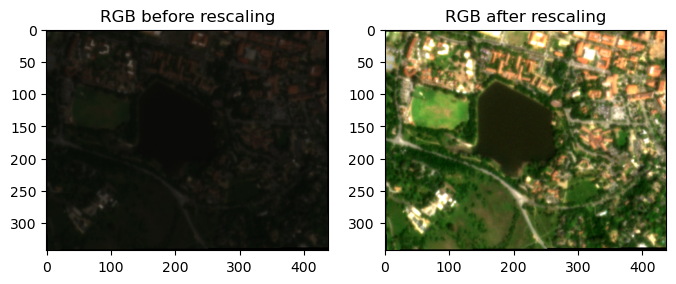

In [18]:
f, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(img)
axes[0].set_title("RGB before rescaling")
axes[1].imshow(img_rescale)
axes[1].set_title("RGB after rescaling");

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) to create a figure with two subplots that display an image before and after rescaling.

- `f, axes = plt.subplots(1, 2, figsize=(8, 3))`: This line is creating a new figure `f` with a grid of subplots. The grid has 1 row and 2 columns. The `figsize` argument is setting the width and height of the figure in inches.

- `axes[0].imshow(img)` and `axes[0].set_title("RGB before rescaling")`: These lines are displaying the image `img` in the first subplot and setting the title of the subplot to "RGB before rescaling". The `imshow` function is used to display an image in a subplot.

- `axes[1].imshow(img_rescale)` and `axes[1].set_title("RGB after rescaling")`: These lines are displaying the rescaled image `img_rescale` in the second subplot and setting the title of the subplot to "RGB after rescaling".

In summary, this code is creating a figure with two subplots, displaying an image before and after rescaling in the subplots, and setting the titles of the subplots to indicate whether the image is before or after rescaling.

We can define a function, and even play with different band orders:

In [19]:
def arr_to_rgb(arr, use_bands=["red", "green", "blue"]):
    band_order = [
        "coastal_blue", "blue", "green_I", "green",
        "yellow", "red", "red_edge", "nir"
    ]
    b1 = arr[band_order.index(use_bands[0])]
    b2 = arr[band_order.index(use_bands[1])]
    b3 = arr[band_order.index(use_bands[2])]

    img = np.stack([b1, b2, b3], axis=2)

    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_rescale

The above Python code defines a function `arr_to_rgb` that converts a 3D array representing a multi-band image into a 3D array representing an RGB image. The function also rescales the intensity values of the image for better visualization.

- `def arr_to_rgb(arr, use_bands=["red", "green", "blue"])`: This line is defining a function named `arr_to_rgb` that takes two arguments: `arr`, a 3D array representing a multi-band image, and `use_bands`, a list of band names to use for the RGB image.

- `band_order = ["coastal_blue", "blue", "green_I", "green", "yellow", "red", "red_edge", "nir"]`: This line is defining a list of band names in the order they appear in `arr`.

- `b1 = arr[band_order.index(use_bands[0])]`, `b2 = arr[band_order.index(use_bands[1])]`, and `b3 = arr[band_order.index(use_bands[2])]`: These lines are finding the indices of the band names in `use_bands` in `band_order` and using those indices to access the corresponding bands in `arr`.

- `img = np.stack([b1, b2, b3], axis=2)`: This line is stacking the three bands into a new 3D array `img` along a new third axis.

- `p2, p98 = np.percentile(img, (2, 98))`: This line is calculating the 2nd and 98th percentiles of the pixel intensity values in `img`.

- `img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))`: This line is rescaling the intensity values of `img` to fall within the range defined by `p2` and `p98`.

- `return img_rescale`: This line is returning the rescaled image.

In summary, this function is converting a multi-band image into an RGB image and rescaling the intensity values of the image for better visualization. The bands used for the RGB image can be specified by the `use_bands` argument.

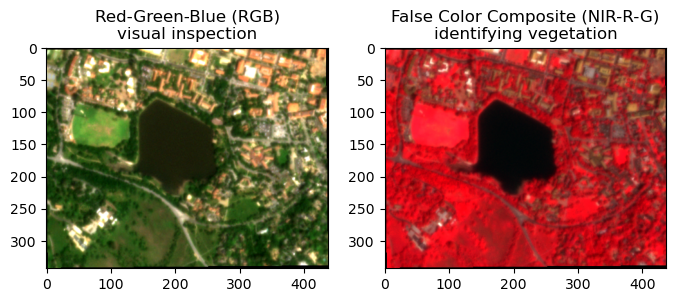

In [20]:
f, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(arr_to_rgb(arr))
axes[0].set_title("Red-Green-Blue (RGB)\nvisual inspection")
axes[1].imshow(arr_to_rgb(arr,  use_bands=["nir", "red", "green"]))
axes[1].set_title("False Color Composite (NIR-R-G)\nidentifying vegetation");

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) to create a figure with two subplots that display two different visualizations of a multi-band image.

- `f, axes = plt.subplots(1, 2, figsize=(8, 3))`: This line is creating a new figure `f` with a grid of subplots. The grid has 1 row and 2 columns. The `figsize` argument is setting the width and height of the figure in inches.

- `axes[0].imshow(arr_to_rgb(arr))` and `axes[0].set_title("Red-Green-Blue (RGB)\nvisual inspection")`: These lines are converting the multi-band array `arr` into an RGB image using the `arr_to_rgb` function, displaying the RGB image in the first subplot, and setting the title of the subplot to "Red-Green-Blue (RGB)\nvisual inspection".

- `axes[1].imshow(arr_to_rgb(arr,  use_bands=["nir", "red", "green"]))` and `axes[1].set_title("False Color Composite (NIR-R-G)\nidentifying vegetation")`: These lines are converting the multi-band array `arr` into an NIR-R-G image using the `arr_to_rgb` function with the `use_bands` argument set to `["nir", "red", "green"]`, displaying the NIR-R-G image in the second subplot, and setting the title of the subplot to "False Color Composite (NIR-R-G)\nidentifying vegetation". An NIR-R-G image is a type of false color composite where the NIR (near-infrared), red, and green bands are used for the red, green, and blue channels of the image, respectively. This type of visualization is often used in remote sensing to identify vegetation, as healthy vegetation strongly reflects NIR light.

In summary, this code is creating a figure with two subplots, displaying an RGB image and an NIR-R-G image in the subplots, and setting the titles of the subplots to indicate the type of visualization and its purpose.

Let's turn these steps into a function, and loop over every image to get a better view of when water began to flood Lake Lagunita.

### Plotting several RGB images

First, we'll sort our files in alphabetical order.  This will allow us to iterate over the list in an order that is chronological.

In [21]:
# These are out of order
files

['/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-12-18_strip_6153179_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-07-30_strip_6682704_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-02-15_strip_6290924_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-03-25_strip_6384901_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-08-16_strip_6717370_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-04-24_strip_6458341_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-08-30_strip_6743722_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-06-30_strip_6615371_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/da

In [22]:
# These are now in alphabetical order
files.sort()
files

['/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-11-15_strip_6080437_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-11-15_strip_6080597_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-11-26_strip_6104067_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-12-02_strip_6117199_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-12-18_strip_6153179_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-01-17_strip_6219068_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-01-30_strip_6250675_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-02-15_strip_6290924_composite.tif',
 '/Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/da

The above Python code is sorting a list of filenames in alphabetical order and then displaying the sorted list.

- `files.sort()`: This line is calling the `sort` method on the `files` list. The `sort` method sorts the elements of the list in place, meaning it modifies the original list rather than creating a new sorted list. By default, `sort` orders the elements in ascending order. If `files` is a list of strings, as is typically the case with filenames, the elements are sorted in lexicographical (alphabetical) order.

- `files`: This line is simply the name of the list, which when executed in a Python notebook cell, will display the contents of the list. In this case, it will display the filenames in the sorted order.

In summary, this code is sorting a list of filenames in alphabetical order and then displaying the sorted list.

In [23]:
# We can decide on how many rows and columns would display a total of 24 images
len(files)

24

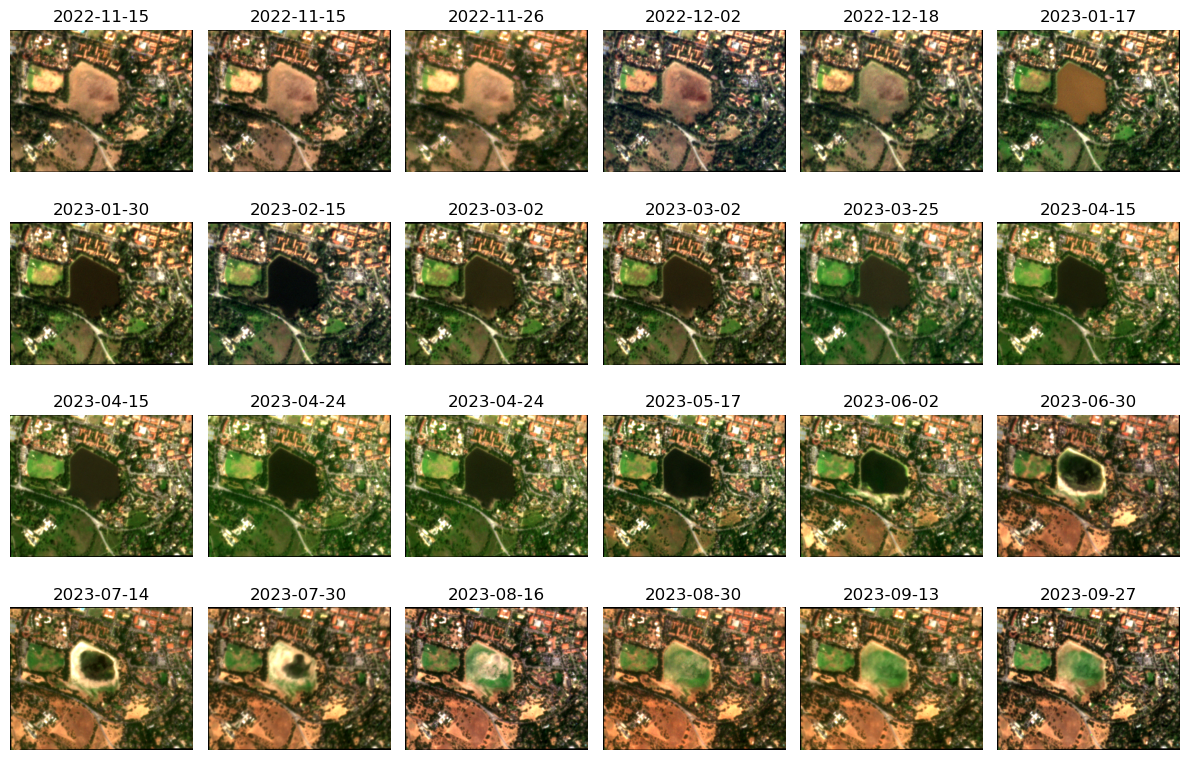

In [24]:
nrow = 4
ncol = 6

f, axes = plt.subplots(nrow, ncol, figsize=(2*ncol, 2*nrow))
for file, ax in zip(files, axes.flatten()):
    with rasterio.open(file) as src:
        arr = src.read()/10000
    rgb_im = arr_to_rgb(arr)
    #rgb_im = arr_to_rgb(arr,  use_bands=["nir", "red", "green"])
    ax.imshow(rgb_im)

    date = os.path.basename(file).split("_")[0]
    ax.set_title(date)

for ax in axes.flatten():
    ax.axis("off")
plt.tight_layout()

The above Python code is creating a grid of subplots, each displaying an RGB image derived from a different file in the `files` list. The images are displayed in a grid with 4 rows and 6 columns.

- `nrow = 4` and `ncol = 6`: These lines are defining the number of rows and columns for the grid of subplots.

- `f, axes = plt.subplots(nrow, ncol, figsize=(2*ncol, 2*nrow))`: This line is creating a new figure `f` with a grid of subplots. The grid has `nrow` rows and `ncol` columns. The `figsize` argument is setting the width and height of the figure in inches.

- `for file, ax in zip(files, axes.flatten()):`: This line is starting a loop over the `files` list and the flattened `axes` array. In each iteration of the loop, a file from the `files` list and an axis from the `axes` array are paired together.

- `with rasterio.open(file) as src:` and `arr = src.read()/10000`: These lines are opening a file using the `rasterio.open` function, reading the file into an array `arr` using the `read` method, and dividing the array by 10000.

- `rgb_im = arr_to_rgb(arr)`: This line is converting the array `arr` into an RGB image using the `arr_to_rgb` function.

- `ax.imshow(rgb_im)`: This line is displaying the RGB image in the current subplot.

- `date = os.path.basename(file).split("_")[0]` and `ax.set_title(date)`: These lines are extracting the date from the filename, which is assumed to be the first part of the filename before an underscore, and setting the title of the subplot to the date.

- `for ax in axes.flatten():` and `ax.axis("off")`: These lines are looping over the flattened `axes` array again and turning off the axis for each subplot.

- `plt.tight_layout()`: This line is adjusting the subplot parameters so that the subplots fit into the figure area nicely.

In summary, this code is creating a grid of subplots, each displaying an RGB image derived from a different file, and setting the title of each subplot to the date extracted from the filename. The axis is turned off for each subplot for a cleaner look.

We can visually assess these images and guess that flooding began at the end of December.

### Raster Analysis with Band Math: Calculating an Index

Next, we'll calculate a spectral index.  Spectral indices are mathematical algorithms used in remote sensing to highlight specific features or characteristics of the Earth's surface.

The Normalized Difference Water Index (NDWI) is derived from the Near-Infrared (NIR) and Green (G) channels. This formula is used to detect water bodies:

NDWI = (G-NIR)/(G+NIR)

Higher NDWI values typically indicate the presence of water, while lower values correspond to land surfaces.  The NDWI values correspond to the following ranges:

| Range      | Description                  |
|------------|------------------------------|
| 0.2 – 1   | Water surface      |
| 0.0 – 0.2   | Flooding, humidity      |
| -0.3 – 0.0    | Moderate drought, non-aqueous surfaces      |
| -1 – -0.3    | Drought, non-aqueous surfaces      |

In [25]:
# Read the test file in with rasterio, and pull Green and NIR
with rasterio.open(test_file) as src:
    arr = src.read()/10000
green = arr[band_order.index("green")]
nir = arr[band_order.index("nir")]

The above Python code is using the `rasterio` library to open a file, read its contents into an array, and then extract the green and near-infrared (NIR) bands from the array.

- `with rasterio.open(test_file) as src:`: This line is opening a file specified by `test_file` using the `rasterio.open` function. The `with` statement is used here to ensure that the file is properly closed after it is no longer needed.

- `arr = src.read()/10000`: This line is reading the file into an array `arr` using the `read` method of the `src` object, and then dividing the array by 10000. This division is typically done to convert the pixel values from integer data type to a floating point data type, which is often necessary when working with satellite imagery data.

- `green = arr[band_order.index("green")]` and `nir = arr[band_order.index("nir")]`: These lines are extracting the green and NIR bands from the array. The `band_order.index("green")` and `band_order.index("nir")` expressions are finding the indices of the "green" and "nir" bands in the `band_order` list, and these indices are used to access the corresponding bands in the `arr` array.

In summary, this code is opening a file, reading its contents into an array, converting the pixel values to a floating point data type, and extracting the green and NIR bands from the array.

In [26]:
ndwi = (green - nir)/(green + nir)

The above Python code is calculating the Normalized Difference Water Index (NDWI) from the green and near-infrared (NIR) bands of an image.

- `ndwi = (green - nir)/(green + nir)`: This line is performing the NDWI calculation. The NDWI is a numerical indicator that uses the green and NIR bands of an image to highlight areas of water. It is calculated by subtracting the NIR band from the green band and dividing the result by the sum of the green and NIR bands. The resulting `ndwi` array will have values ranging from -1 to 1, where higher values indicate the presence of water.

In summary, this code is calculating the NDWI from the green and NIR bands of an image to highlight areas of water.

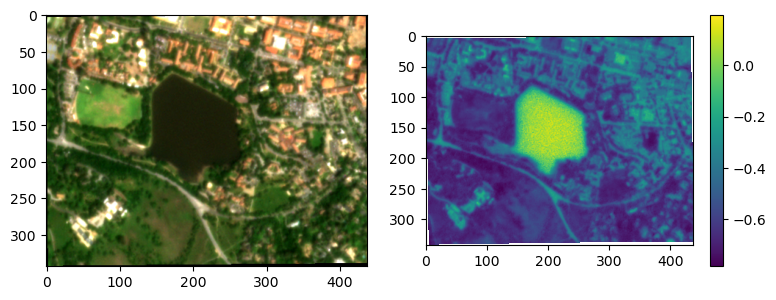

In [27]:
f, axes = plt.subplots(1, 2, figsize=(8, 3))

# plot the RGB in the first subplot
rgb = arr_to_rgb(arr)
axes[0].imshow(rgb)

# Plot NDWI in the second subplot, high values will indicate the presence of water.
im = axes[1].imshow(ndwi)
f.colorbar(im, ax=axes[1])

plt.tight_layout();

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) to create a figure with two subplots. The first subplot displays an RGB image, and the second subplot displays the Normalized Difference Water Index (NDWI) image.

- `f, axes = plt.subplots(1, 2, figsize=(8, 3))`: This line is creating a new figure `f` with a grid of subplots. The grid has 1 row and 2 columns. The `figsize` argument is setting the width and height of the figure in inches.

- `rgb = arr_to_rgb(arr)` and `axes[0].imshow(rgb)`: These lines are converting the multi-band array `arr` into an RGB image using the `arr_to_rgb` function, and displaying the RGB image in the first subplot.

- `im = axes[1].imshow(ndwi)` and `f.colorbar(im, ax=axes[1])`: These lines are displaying the NDWI image in the second subplot and adding a colorbar to the subplot. The colorbar provides a visual indication of the NDWI values, with high values indicating the presence of water.

- `plt.tight_layout();`: This line is adjusting the subplot parameters so that the subplots fit into the figure area nicely.

In summary, this code is creating a figure with two subplots, displaying an RGB image in the first subplot, displaying an NDWI image in the second subplot with a colorbar, and adjusting the subplot parameters for a nice layout.

Spectral indices like NDWI help us to objectively declare an area we're looking at is likely "water"

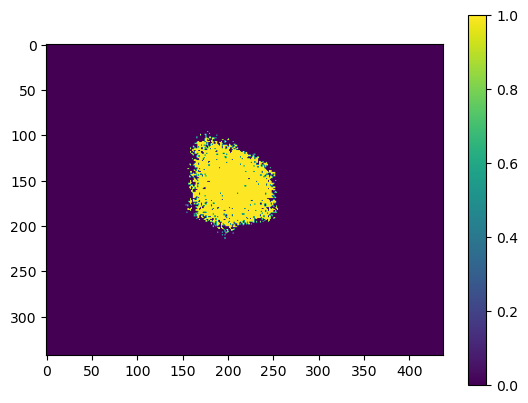

In [28]:
f, ax = plt.subplots()
im = plt.imshow(ndwi > 0)
f.colorbar(im, ax=ax)

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) to create a figure with a single subplot. This subplot displays a binary image derived from the Normalized Difference Water Index (NDWI) array, where pixels with NDWI values greater than 0 are marked as True (or 1) and the rest as False (or 0). A colorbar is also added to the subplot.

- `f, ax = plt.subplots()`: This line is creating a new figure `f` with a single subplot `ax`.

- `im = plt.imshow(ndwi > 0)`: This line is creating a binary image from the NDWI array by comparing each value in the array to 0. If the NDWI value is greater than 0, the corresponding pixel in the binary image is set to True (or 1), otherwise it is set to False (or 0). This binary image is then displayed in the subplot.

- `f.colorbar(im, ax=ax)`: This line is adding a colorbar to the subplot. The colorbar provides a visual indication of the binary values in the image, with one color representing True (or 1) and another color representing False (or 0).

In summary, this code is creating a figure with a single subplot, displaying a binary image derived from the NDWI array in the subplot, and adding a colorbar to the subplot.

### Vector Data: How does NDWI look inside of our Lake Lagunita Boundary?

Next, we'll read a vector dataset containing boundaries around Lake Lagunita.

In this section, we will load a geojson into a geodataframe.

In [29]:
# boundaries which surround the lake
geojson_filename = os.path.join(data_dir, 'geoms', 'lake-lagunita.geojson')
gdf = gpd.read_file(geojson_filename)
gdf

geometry
0  POLYGON ((-122.17712 37.42450, -122.17800 37.4...

The above Python code is using the `os` and `geopandas` libraries to read a GeoJSON file that contains the boundaries of a lake.

- `geojson_filename = os.path.join(data_dir, 'geoms', 'lake-lagunita.geojson')`: This line is constructing the path to the GeoJSON file. The `os.path.join` function is used to ensure that the path is constructed correctly regardless of the operating system. The `data_dir` variable is assumed to contain the path to the directory where the data files are stored.

- `gdf = gpd.read_file(geojson_filename)`: This line is using the `geopandas.read_file` function to read the GeoJSON file into a GeoDataFrame `gdf`. A GeoDataFrame is a data structure that can store geometric objects, such as points, lines, and polygons, along with associated attributes.

- `gdf`: This line is simply the name of the GeoDataFrame, which when executed in a Python notebook cell, will display the contents of the GeoDataFrame. In this case, it will display the boundaries of the lake.

In summary, this code is constructing the path to a GeoJSON file, reading the file into a GeoDataFrame, and displaying the contents of the GeoDataFrame.

A geodataframe is like a pandas dataframe, but contains a standardized spatial attribute called "geometry" which can be used to map a vector dataset spatially or to extract data from spatial geotiffs.

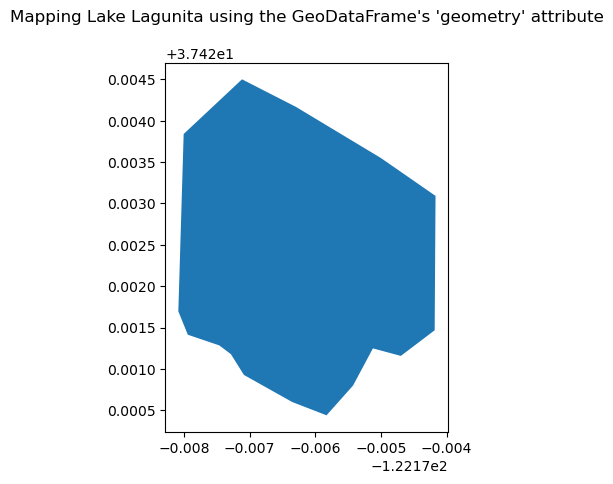

In [30]:
gdf.plot()
plt.title("Mapping Lake Lagunita using the GeoDataFrame's 'geometry' attribute\n");

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) and the `plot` method from the `geopandas` library to create a plot of the geometries stored in a GeoDataFrame (`gdf`).

- `gdf.plot()`: This line is calling the `plot` method on the GeoDataFrame `gdf`. The `plot` method creates a plot of the geometries stored in the 'geometry' column of the GeoDataFrame. In this case, it's likely that the geometries represent the boundaries of Lake Lagunita.

- `plt.title("Mapping Lake Lagunita using the GeoDataFrame's 'geometry' attribute\n")`: This line is setting the title of the plot. The title provides a description of what the plot represents.

In summary, this code is creating a plot of the geometries stored in a GeoDataFrame, which likely represent the boundaries of Lake Lagunita, and setting the title of the plot.

### Masking raster data with vector data
To join these two, we can create an array out of our vector dataset that is True where Lake Lagunita is present.

Converting the vector dataset to a raster requires using the CRS and Tranform of the source raster.

In [31]:
with rasterio.open(test_file) as src:
    # reading metadata
    metadata = src.meta

# Cast to the same CRS as the rasterio image
gdf_crs = gdf.to_crs(metadata["crs"])

# Create an array with a geometry mask
aoi_mask = features.geometry_mask(gdf_crs.geometry, ndwi.shape, metadata["transform"])
# Flipping the mask so that True values are over the field
lake_mask = ~aoi_mask

The above Python code is using the `rasterio` and `geopandas` libraries to read metadata from a file, convert a GeoDataFrame to the same Coordinate Reference System (CRS) as the file, and create a geometry mask.

- `with rasterio.open(test_file) as src:` and `metadata = src.meta`: These lines are opening a file specified by `test_file` using the `rasterio.open` function and reading the metadata of the file into the `metadata` dictionary. The metadata typically includes information such as the CRS, the image dimensions, and the data type.

- `gdf_crs = gdf.to_crs(metadata["crs"])`: This line is converting the CRS of the GeoDataFrame `gdf` to the same CRS as the file. The `to_crs` method is used to perform the conversion, and the CRS of the file is accessed from the `metadata` dictionary.

- `aoi_mask = features.geometry_mask(gdf_crs.geometry, ndwi.shape, metadata["transform"])`: This line is creating a geometry mask using the `features.geometry_mask` function. The geometry mask is an array of the same shape as the NDWI image (`ndwi.shape`), where pixels that fall within the geometries in `gdf_crs.geometry` are marked as False and the rest as True.

- `lake_mask = ~aoi_mask`: This line is flipping the values in the `aoi_mask` array. The `~` operator is a bitwise NOT operator that flips bits, which in this context means that it changes True values to False and vice versa. The result is a mask where pixels that fall within the lake are marked as True.

In summary, this code is reading metadata from a file, converting a GeoDataFrame to the same CRS as the file, creating a geometry mask, and flipping the values in the mask.

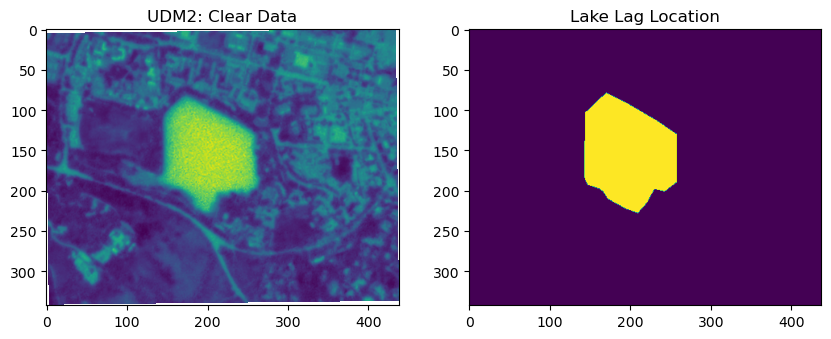

In [32]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(ndwi)
axes[0].set_title("UDM2: Clear Data")
axes[1].imshow(lake_mask)
axes[1].set_title("Lake Lag Location");

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) to create a figure with two subplots. The first subplot displays the Normalized Difference Water Index (NDWI) image, and the second subplot displays a mask of a lake location.

- `f, axes = plt.subplots(1, 2, figsize=(10, 5))`: This line is creating a new figure `f` with a grid of subplots. The grid has 1 row and 2 columns. The `figsize` argument is setting the width and height of the figure in inches.

- `axes[0].imshow(ndwi)` and `axes[0].set_title("UDM2: Clear Data")`: These lines are displaying the NDWI image in the first subplot and setting the title of the subplot to "UDM2: Clear Data".

- `axes[1].imshow(lake_mask)` and `axes[1].set_title("Lake Lag Location")`: These lines are displaying the lake mask in the second subplot and setting the title of the subplot to "Lake Lag Location".

In summary, this code is creating a figure with two subplots, displaying an NDWI image in the first subplot with a title, displaying a lake mask in the second subplot with a title.

Yellow are Trues in the right image.

Below, we can use the lake_mask to mask values in the NDWI array

In [33]:
# all NDWI values in the lake
ndwi[lake_mask]

array([-0.59990242, -0.60466849, -0.58866684, ..., -0.49433249,
       -0.52315914, -0.52229498])

The above Python code is using the Normalized Difference Water Index (NDWI) array and a lake mask to extract the NDWI values for the area of the lake.

- `ndwi[lake_mask]`: This line is indexing the NDWI array with the lake mask. The lake mask is a boolean array of the same shape as the NDWI array, where pixels that fall within the lake are marked as True and the rest as False. When used to index the NDWI array, this line returns an array of the NDWI values for the pixels that fall within the lake.

In summary, this code is extracting the NDWI values for the area of the lake using a lake mask.

The median of the masked values will be the median for the lake in the NDWI array.

In [34]:
median_ndwi_in_lake = ndwi[lake_mask].mean()
print(f"The median NDWI in measured in the lake is {median_ndwi_in_lake}")

The median NDWI in measured in the lake is -0.043109648565362306


The above Python code is calculating the mean of the Normalized Difference Water Index (NDWI) values for the area of a lake and printing the result.

- `median_ndwi_in_lake = ndwi[lake_mask].mean()`: This line is indexing the NDWI array with the lake mask to get the NDWI values for the area of the lake, and then calculating the mean of these values. The result is stored in the `median_ndwi_in_lake` variable. Note that despite the variable name, the `mean` function is used here, which calculates the average, not the median.

- `print(f"The median NDWI in measured in the lake is {median_ndwi_in_lake}")`: This line is printing a formatted string that includes the mean NDWI value for the lake. The `{median_ndwi_in_lake}` part of the string is a placeholder that gets replaced with the value of the `median_ndwi_in_lake` variable when the string is printed.

In summary, this code is calculating the mean NDWI value for the area of a lake and printing the result.

In [35]:
median_ndwi_in_lake = ndwi[~np.isnan(ndwi) * ~lake_mask].mean()
print(f"The median NDWI in measured outside of the lake is {median_ndwi_in_lake}")

The median NDWI in measured outside of the lake is -0.5508857888236413


The above Python code is calculating the mean of the Normalized Difference Water Index (NDWI) values for the area outside of a lake and printing the result.

- `median_ndwi_in_lake = ndwi[~np.isnan(ndwi) * ~lake_mask].mean()`: This line is performing several operations. First, `np.isnan(ndwi)` creates a boolean mask where True values correspond to NaN values in the NDWI array. The `~` operator inverts this mask, so True values correspond to non-NaN values. This is multiplied (`*`) with the inverted lake mask (`~lake_mask`), which has True values for areas outside the lake. The result is a mask that is True for non-NaN values outside the lake. This mask is used to index the NDWI array and the mean of these values is calculated. The result is stored in the `median_ndwi_in_lake` variable. Note that despite the variable name, the `mean` function is used here, which calculates the average, not the median.

- `print(f"The median NDWI in measured outside of the lake is {median_ndwi_in_lake}")`: This line is printing a formatted string that includes the mean NDWI value for the area outside the lake. The `{median_ndwi_in_lake}` part of the string is a placeholder that gets replaced with the value of the `median_ndwi_in_lake` variable when the string is printed.

In summary, this code is calculating the mean NDWI value for the area outside of a lake and printing the result.

### Calculating a timeseries with an area of interest

Next, we'll scale up this workflow to run over every image and plot a timeseries of NDWI in Lake Lagunita.

In [36]:
def calc_ndwi(image_filepath):
    """
    Wrapper to calculate NDWI for an image
    """
    with rasterio.open(image_filepath) as src:
        arr = src.read()/10000
    green = arr[band_order.index("green")]
    nir = arr[band_order.index("nir")]
    ndwi = (green - nir)/(green + nir)

    return ndwi

def median_ndwi_in_aoi(image_filepath, geojson_filepath):
    """
    Wrapper to report median NDWI within a geojson geometry for an input image.
    """

    ndwi = calc_ndwi(image_filepath)
    with rasterio.open(image_filepath) as src:
        metadata = src.meta

    # Create an array with True values over the field location
    gdf = gpd.read_file(geojson_filepath)
    aoi_mask = features.geometry_mask(
            gdf.to_crs(metadata["crs"]).geometry, ndwi.shape, metadata["transform"])

    median_ndwi_in_lake = ndwi[lake_mask].mean()

    return median_ndwi_in_lake

The above Python code defines two functions, `calc_ndwi` and `median_ndwi_in_aoi`, which are used to calculate the Normalized Difference Water Index (NDWI) for an image and to calculate the mean NDWI within a specified area of interest (AOI), respectively.

- `calc_ndwi(image_filepath)`: This function takes an image file path as input, opens the image file using `rasterio.open`, reads the image data into an array and scales it by dividing by 10000. It then extracts the green and near-infrared (nir) bands from the array using their indices in `band_order`. The NDWI is calculated as `(green - nir) / (green + nir)`, and the resulting NDWI array is returned.

- `median_ndwi_in_aoi(image_filepath, geojson_filepath)`: This function takes an image file path and a GeoJSON file path as input. It calculates the NDWI for the image using the `calc_ndwi` function. It then opens the image file again to read its metadata. It reads the GeoJSON file into a GeoDataFrame using `gpd.read_file`, and creates a geometry mask for the AOI by converting the GeoDataFrame to the CRS of the image and using `features.geometry_mask`. It then calculates the mean NDWI within the AOI by indexing the NDWI array with the AOI mask and calling `mean` on the result. The mean NDWI is returned. Note that despite the function name, the `mean` function is used here, which calculates the average, not the median.

In summary, these functions are used to calculate the NDWI for an image and to calculate the mean NDWI within a specified AOI.

Below, we'll create empty lists for `dates` and `medians` which we'll fill with values as we loop through each file.

In [37]:
dates = []
medians = []
for im_filepath in files:
    # From the filename, we'll pull dates.
    filename = os.path.basename(im_filepath)
    date = filename.split("_")[0]
    print(f"Original filename: {im_filepath}")
    print(f"Date: {date}")
    dates.append(date)

    # Calculate medians
    median = median_ndwi_in_aoi(im_filepath, geojson_filename)
    medians.append(median)

Original filename: /Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-11-15_strip_6080437_composite.tif
Date: 2022-11-15
Original filename: /Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-11-15_strip_6080597_composite.tif
Date: 2022-11-15
Original filename: /Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-11-26_strip_6104067_composite.tif
Date: 2022-11-26
Original filename: /Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-12-02_strip_6117199_composite.tif
Date: 2022-12-02
Original filename: /Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2022-12-18_strip_6153179_composite.tif
Date: 2022-12-18
Original filename: /Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-01-17_strip_6219068_composite.tif
Date: 2023-01-17
Original filename: /Users/maples/Scratch/GISDay2023/Stanford GIS Day 2023 2/Workshop 2/data/2023-01-30_strip_625

The above Python code is iterating over a list of image file paths, extracting the date from each file name, calculating the mean Normalized Difference Water Index (NDWI) within a specified area of interest (AOI) for each image, and storing the dates and mean NDWI values in lists.

- `dates = []` and `medians = []`: These lines are initializing two empty lists, `dates` and `medians`, which will be used to store the dates extracted from the file names and the mean NDWI values, respectively.

- `for im_filepath in files:`: This line is starting a loop that iterates over each file path in the `files` list.

- `filename = os.path.basename(im_filepath)` and `date = filename.split("_")[0]`: These lines are extracting the base name of the file (i.e., the file name without the directory path) using `os.path.basename`, splitting the file name into parts at each underscore (`_`) using `split`, and taking the first part as the date.

- `print(f"Original filename: {im_filepath}")` and `print(f"Date: {date}")`: These lines are printing the original file path and the extracted date.

- `dates.append(date)`: This line is adding the extracted date to the `dates` list.

- `median = median_ndwi_in_aoi(im_filepath, geojson_filename)` and `medians.append(median)`: These lines are calculating the mean NDWI within the AOI for the image using the `median_ndwi_in_aoi` function, and adding the result to the `medians` list.

In summary, this code is extracting dates from file names, calculating mean NDWI values within an AOI for each image, and storing the dates and mean NDWI values in lists.

Next, we can plot all dates and values as a scatterplot.

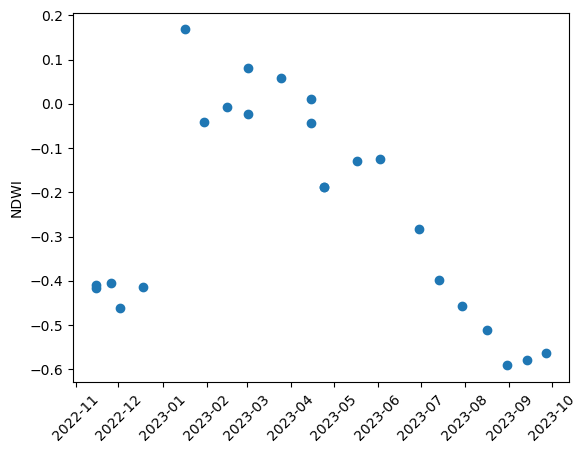

In [38]:
f, ax = plt.subplots()

ax.scatter(pd.to_datetime(dates), medians)
for label in ax.get_xticklabels():
    label.set_rotation(45)
ax.set_ylabel("NDWI");

The above Python code is using the `matplotlib.pyplot` library (imported as `plt`) to create a scatter plot of mean Normalized Difference Water Index (NDWI) values over time.

- `f, ax = plt.subplots()`: This line is creating a new figure `f` with a single subplot `ax`.

- `ax.scatter(pd.to_datetime(dates), medians)`: This line is creating a scatter plot on the subplot `ax`. The x-coordinates of the points are the dates converted to datetime objects using `pd.to_datetime`, and the y-coordinates of the points are the mean NDWI values. Each point represents the mean NDWI value on a particular date.

- `for label in ax.get_xticklabels(): label.set_rotation(45)`: These lines are rotating the x-axis tick labels 45 degrees. This can make the labels easier to read if they are long or if there are many of them.

- `ax.set_ylabel("NDWI")`: This line is setting the label for the y-axis to "NDWI".

In summary, this code is creating a scatter plot of mean NDWI values over time, with the x-axis tick labels rotated 45 degrees.

From this plot, we can guess that Lake Lagunita began flooding in mid-December.

Congratulations! You've finished the Processing with Python workshop.